# Laboratory of Computational Physics Mod. A - Pylab 08

## Student

Luca Menti

## ID

2063594


## Email

luca.menti@studenti.unipd.it

## Course

Physics of Data

# Exercise 1

###  1. PCA on 3D dataset

### - Generate a dataset with 3 features each with N entries (N being $ O(1000)$ ). With $ N(\mu, \sigma) $ the normali distribution with mean $\mu$ and standard deviation $\sigma$, generate 3 variables $x_{1,2,3}$ such that:
#### - $x_{1}$ is distribuited as $N(0,1)$
#### - $x_{2}$ is distribuited as $N(0,1)$ +  $x_{1}$
#### - $x_{3}$ is distribuited as  $ 2 x_{1}$ +  $x_{2}$



### - Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
### - Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
### - What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
### - Redefine the data in the basis yielded by the PCA procedure
### - Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd

# Generate a 3D dataset 
N   = 1000

x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 1, N)
x3 = 2*x1 + x2

M = np.array([x1, x2, x3])

# Find eigenvectors and eigenvalues of the covariance matrix of the dataset (sorting them)
cov_M = np.cov(M)
l, V = la.eig(cov_M)
idx = np.argsort(l)[::-1]
l = l[idx]
V = V[:, idx]
print("Eigendecomposition")
print(np.real_if_close(l), "\n", V)

# Find eigenvectors and eigenvalues of the covariance matrix of the dataset using SVD, check that results matches
U, spectrum, Vt = la.svd(M)
print("----------------------------------------------------------------------", "\n\n SVD")
print(spectrum**2/(N-1), "\n", U)

print("\n\n Results matches?")
print("Spectrum:\n", np.allclose(l, spectrum**2/(N-1), 1e-3))
print("Eigenvectors:\n", np.allclose(V, U, 1e-3))

Eigendecomposition
[1.30389883e+01 4.56259685e-01 4.06672961e-16] 
 [[-0.26676211  0.51202667 -0.81649658]
 [-0.36033993 -0.83874219 -0.40824829]
 [-0.89386415  0.18531115  0.40824829]]
---------------------------------------------------------------------- 

 SVD
[1.30390276e+01 4.57053880e-01 1.60581629e-30] 
 [[-0.2667693   0.51202292 -0.81649658]
 [-0.36032814 -0.83874726 -0.40824829]
 [-0.89386675  0.18529858  0.40824829]]


 Results matches?
Spectrum:
 False
Eigenvectors:
 True


Recall that spectrum are the square root of the eigenvalues of $MM^{T}$ , for matching with the covariance matrix we have to notice that, having 0 mean for all features $cov_{M}=MM^{T}/(N-1)$ . Using this mapping we notice that the resulting eigenvalues are slightly different for the two differents methods, in particular for the smallest one.

About the eigenvectors we look at the columns of $V$ for the eigendecomposition and $U$ for the SVD. Again, values are very similiar but not identical, also one column is switched for $U$ w.r.t $V$

In [2]:
# What percent of the total dataset's variability is explained by the principal components? 
Lambda=np.diag(np.real_if_close(l))
print("p=3 => k=1,2")
print ("PCA w k=1 (0):",abs(Lambda[0,0])/Lambda.trace(), "of the total variability conserved")
print ("PCA w k=1 (1):",abs(Lambda[1,1])/Lambda.trace(), "of the total variability conserved")
print ("PCA w k=1 (2):",abs(Lambda[2,2])/Lambda.trace(), "of the total variability conserved")

print ("PCA w k=2 (0,1):",abs(Lambda[0,0]+Lambda[1,1])/Lambda.trace(), "of the total variability conserved")
print ("PCA w k=2 (0,2):",abs(Lambda[0,0]+Lambda[2,2])/Lambda.trace(), "of the total variability conserved")
print ("PCA w k=2 (1,2):",abs(Lambda[1,1]+Lambda[2,2])/Lambda.trace(), "of the total variability conserved")

p=3 => k=1,2
PCA w k=1 (0): 0.9661910854470172 of the total variability conserved
PCA w k=1 (1): 0.03380891455298285 of the total variability conserved
PCA w k=1 (2): 3.013453046016995e-17 of the total variability conserved
PCA w k=2 (0,1): 1.0 of the total variability conserved
PCA w k=2 (0,2): 0.9661910854470172 of the total variability conserved
PCA w k=2 (1,2): 0.03380891455298288 of the total variability conserved


Given how the dataset was constructed, do these make sense? It make sense, we are supposed to have a dataset with only one independent component. From the principal component analysis we obtain that one component encloses 0.92 of the variability as expected, taking two components we arrive at almost 1 of the variability, again as expected hence x3 was built from x1 and x2.

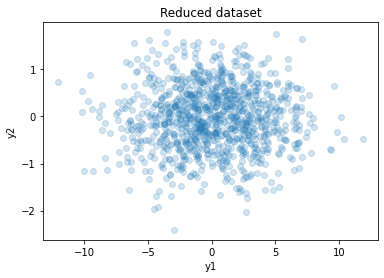

In [3]:
# Redefine the data in the basis yielded by the PCA procedure
M_ = np.dot(V.T, M)

# Reduce the dimensionality of the system so that at least 99%of the total variability is retained.
M_reduced = M_[:-1,:]
plt.scatter(M_reduced[0], M_reduced[1], alpha=0.2)
plt.xlabel("y1")
plt.ylabel("y2")
plt.title("Reduced dataset")
plt.show()

Text(0, 0.5, 'y3')

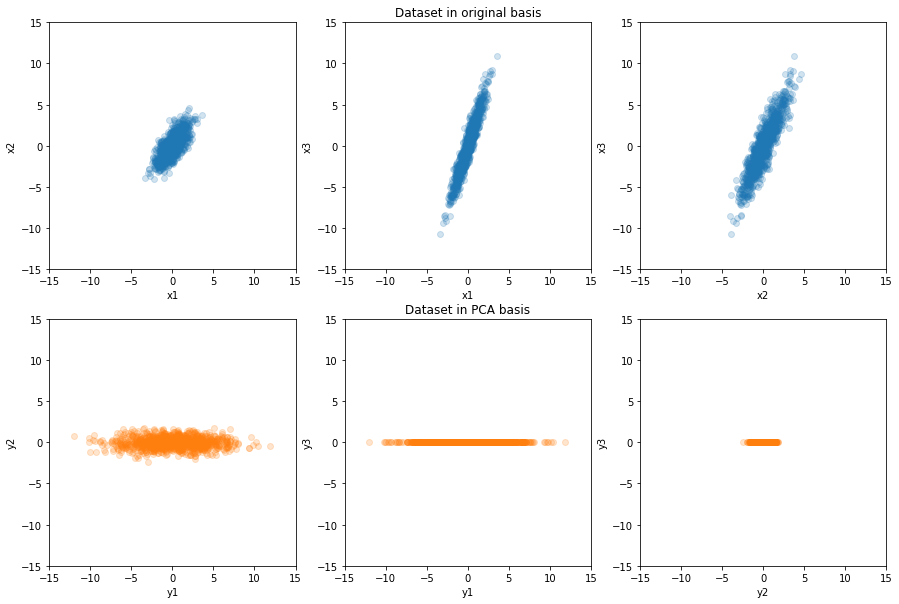

In [4]:
# Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows
# of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) projections.

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

ax1.scatter(M[0, :], M[1, :], alpha=0.2)
ax1.set_xlim([-15,15])
ax1.set_ylim([-15,15])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")

ax2.set_title("Dataset in original basis")
ax2.scatter(M[0, :], M[2, :], alpha=0.2)
ax2.set_xlim([-15,15])
ax2.set_ylim([-15,15])
ax2.set_xlabel("x1")
ax2.set_ylabel("x3")

ax3.scatter(M[1, :], M[2, :], alpha=0.2)
ax3.set_xlim([-15,15])
ax3.set_ylim([-15,15])
ax3.set_xlabel("x2")
ax3.set_ylabel("x3")

ax4.scatter(M_[0, :], M_[1, :], alpha=0.2, c = "tab:orange")
ax4.set_xlim([-15,15])
ax4.set_ylim([-15,15])
ax4.set_xlabel("y1")
ax4.set_ylabel("y2")

ax5.set_title("Dataset in PCA basis")
ax5.scatter(M_[0, :], M_[2, :], alpha=0.2, c = "tab:orange")
ax5.set_xlim([-15,15])
ax5.set_ylim([-15,15])
ax5.set_xlabel("y1")
ax5.set_ylabel("y3")

ax6.scatter(M_[1, :], M_[2, :], alpha=0.2, c = "tab:orange")
ax6.set_xlim([-15,15])
ax6.set_ylim([-15,15])
ax6.set_xlabel("y2")
ax6.set_ylabel("y3")

# Exercise 2

### 2. PCA on a nD dataset

### Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and  $x_2$.

### Repeat the PCA procedure and compare the results with what you obtained before

In [5]:
noise = []
for i in range(10):
    noise.append(np.random.normal(0, 1/50, N))

M_ = np.concatenate((M, np.array(noise)))

cov_M_ = np.cov(M_)
l, V = la.eig(cov_M_)
Lambda=np.diag(np.real_if_close(l))
print(np.real_if_close(l)/np.trace(Lambda))

[9.65909133e-01 3.37996736e-02 3.73098482e-17 3.38920038e-05
 2.42161351e-05 3.19494080e-05 3.13162423e-05 3.02701322e-05
 2.98457888e-05 2.86685336e-05 2.79159514e-05 2.65895363e-05
 2.65298906e-05]


In [6]:
print ("PCA w k=2 (0,1):",abs(Lambda[0,0]+Lambda[1,1])/Lambda.trace(), "of the total variability conserved")

PCA w k=2 (0,1): 0.9997088063780153 of the total variability conserved


# Exercise 3

### 3 . Looking at an oscillating spring (optional)

### Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each camera record the motion of the spring looking at it along a given direction defined by the pair $( \phi_i , \theta_i)$  the angles in spherical coordinates.

### Start from the simulation of the records  ( say $O (1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$.
### Rotate such dataset to emulate the records of each camera.

### Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.

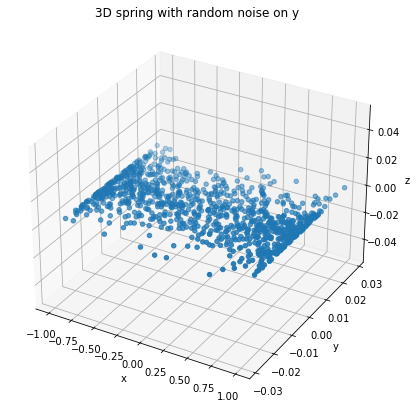

In [7]:
N  = 1000
t0 = 0
dt = 0.1
x = [np.cos(t0+dt*i) for i in range(1000)]

# assume little randome noise for y measurements
y = np.random.normal(0, 0.01, N)

z = np.zeros(N)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
ax.set_title("3D spring with random noise on y")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

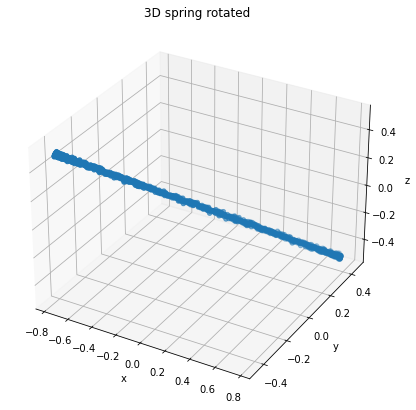

In [8]:
def camera(phi, theta):
    rot_z = np.array([[np.cos(phi), -np.sin(phi), 0], [np.sin(phi), np.cos(phi), 0], [0, 0, 1]])
    rot_y = np.array([[np.cos(theta), 0, np.sin(theta)], [0, 1, 0], [-np.sin(theta), 0, np.cos(theta)]])
    return rot_z.dot(rot_y)

# check rotation 
rot = camera(np.pi/6, np.pi/6).dot(np.array([x, y, z]))
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(rot[0], rot[1], rot[2])
ax.set_title("3D spring rotated")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [9]:
# create the dataset
original_positions = np.array([x, y, z])

n = 6
theta = np.random.uniform(0, np.pi, n)
phi   = np.random.uniform(0, 2*np.pi, n)

views = []
for p, t in zip(phi, theta):
    views.append(camera(p, t).dot(original_positions))
    
full_dataset =[x, y, z]
for v in views:
    for i in range(3):
        full_dataset.append(v[i])
full_dataset = np.array(full_dataset)
    

In [10]:
cov_M = np.cov(full_dataset)
l, V = la.eig(cov_M)

Lambda=np.diag(np.real_if_close(l))
print(np.real_if_close(l)/np.trace(Lambda))

[ 9.99815554e-01  1.84445796e-04 -1.23829939e-16 -5.58711561e-17
 -5.58711561e-17 -6.42593457e-17  7.08199825e-17 -4.31164130e-17
  5.83887903e-17  4.00535121e-17  4.00535121e-17  3.62049271e-17
 -2.46515106e-17  1.49078469e-17 -9.40233588e-18 -9.40233588e-18
  7.91159373e-18 -3.87204524e-18  1.41192528e-18  8.28307359e-21
  0.00000000e+00]


# Exercise 4

### 4. PCA on the MAGIC dataset (optional)

### Perform a PCA on the magic04.data dataset

In [12]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2023-01-12 09:20:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1,4M) [application/x-httpd-php]
Saving to: ‘/Users/lukementi/data/magic04.data’

magic04.data        100%[===================>]   1,41M  1,13MB/s    in 1,2s    

2023-01-12 09:20:54 (1,13 MB/s) - ‘/Users/lukementi/data/magic04.data’ saved [1477391/1477391]

--2023-01-12 09:20:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5,3K) [application/x-httpd-php]
Saving to: ‘/Users/lukementi/data/magic04.names’

magic04.na

In [14]:
df = pd.read_csv("magic04.data", index_col = False)
labels = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df.columns = labels

# class h is background
df = df[df["class"]=="g"]
df = df.drop(["class"], axis=1)
dataset = df.to_numpy()
dataset = dataset.reshape((dataset.shape[1], dataset.shape[0]))

cov_M = np.cov(dataset[:,:1000])
l, V = la.eig(cov_M)

Lambda=np.diag(np.real_if_close(l))
l = -np.sort(-np.real_if_close(l))

pca = l/np.trace(Lambda)
print(pca)
var = 0
for k in range(1, len(pca)+1):
    var = pca[:k].sum()
    if var > 0.9 :
        print("pca succed with k =", k, " with variability of", var)
        break
    elif k == len(pca)-1:
        print("pca failed, max variability reached is ", var, "with", k, "compenents out of", len(pca))


[0.16645484 0.16515049 0.11828735 0.10941359 0.09769913 0.09561794
 0.08052453 0.07916915 0.06578007 0.0219029 ]
pca succed with k = 8  with variability of 0.9123170293841736
